### Minibatch placeholders

In [1]:
import tensorflow as tf

d = 4
#Input
x = tf.placeholder(tf.float32, (None, d))
#Output
y = tf.placeholder(tf.float32, (None))

### Hidden Layer

In [2]:
n_hidden = 4
w = tf.Variable(tf.random_normal((d, n_hidden)))
b = tf.Variable(tf.random_normal((d,)))
x_hidden = tf.nn.relu(tf.matmul(x, w) + b)
#Adding Dropout
keep_prob = tf.placeholder(tf.float32)
x_hidden = tf.nn.dropout(x_hidden, keep_prob)

### Output Unit

In [3]:
w_out = tf.Variable(tf.random_normal((d, 1)))
b_out = tf.Variable(tf.random_normal((1,)))
y_logit = tf.matmul(x_hidden, w_out) + b_out
y_pred = tf.round(tf.sigmoid(y_logit))

### Cross-Entropy Loss

In [4]:
y_expand = tf.expand_dims(y, 1)
entropy = tf.nn.sigmoid_cross_entropy_with_logits(logits=y_logit, labels=y_expand)
l = tf.reduce_sum(entropy)

### Optimizer

In [5]:
train_op = tf.train.AdamOptimizer(.001).minimize(l)

### Getting IRIS dataset

In [6]:
import os
import requests

import tensorflow as tf
import numpy as np

IRIS_TRAINING = "iris_training.csv"
IRIS_TRAINING_URL = "http://download.tensorflow.org/data/iris_training.csv"

IRIS_TEST = "iris_test.csv"
IRIS_TEST_URL = "http://download.tensorflow.org/data/iris_test.csv"

if not os.path.exists(IRIS_TRAINING):
    raw = requests.get(IRIS_TRAINING_URL).content
    with open(IRIS_TRAINING,'wb') as f:
        f.write(raw)

if not os.path.exists(IRIS_TEST):
    raw = requests.get(IRIS_TEST_URL).content
    with open(IRIS_TEST,'wb') as f:
        f.write(raw)
        
training_set = tf.contrib.learn.datasets.base.load_csv_with_header(filename=IRIS_TRAINING,target_dtype=np.int,features_dtype=np.float32)
test_set = tf.contrib.learn.datasets.base.load_csv_with_header(filename=IRIS_TEST, target_dtype=np.int,features_dtype=np.float32)

Instructions for updating:
Use tf.data instead.


### Training

In [12]:
import numpy as np
from sklearn.metrics import accuracy_score

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    loss_list = list()
    for step in range(1000):
        feed_dict = {x: training_set.data, y: training_set.target, keep_prob: 0.3}
        _, loss = sess.run([train_op, l], feed_dict=feed_dict)
        loss_list.append(loss)
    y_pred_out = sess.run(y_pred, feed_dict={x: test_set.data, keep_prob: 1.0})
    print("Accuracy Score: {}".format(accuracy_score(test_set.target, y_pred_out)))

Accuracy Score: 0.7333333333333333


### Training Loss

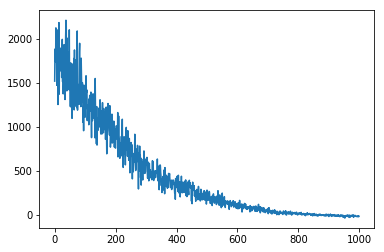

In [13]:
import matplotlib.pyplot as plt
plt.plot(range(1000), loss_list)
plt.show()